In [105]:
def GM76(m, ω, N, f, E0=3e-3, N0=3., m0=4):
    # N in cycles per hour
    ms = m0*N/N0
    return (N/N0)*E0*(2*f/np.pi)*((ω*np.sqrt(ω**2-f**2))**-1)*(2./np.pi)*(ms**2/(ms**2 + m**2))
    

In [106]:
import numpy as np

In [117]:
N = 1.e-3
Ncph = N*2.*np.pi*3600. # convert from 1/s to cph
f=5.3e-5

m = np.logspace(np.log10(1e-1), np.log10(1e5), 100)[:, np.newaxis]
ω = np.logspace(np.log10(f), np.log10(N), 101)[np.newaxis, 1:]

gm = GM76(m, ω, Ncph, f)

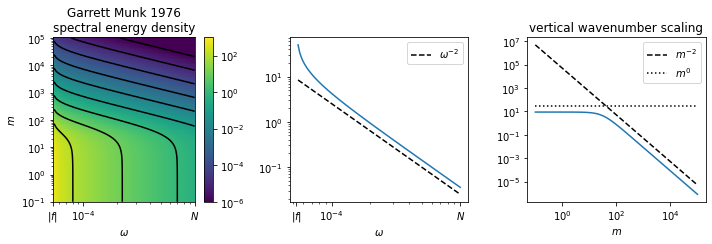

In [175]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(10,3.5))
plt.subplot(1,3,1)
plt.title("Garrett Munk 1976\nspectral energy density")
plt.pcolor(ω.flatten(), m.flatten(), gm, norm=matplotlib.colors.LogNorm(vmin=1e-6, vmax=1e3), shading="auto")
plt.colorbar()
plt.contour(ω.flatten(), m.flatten(), gm, levels=10.**np.arange(-6, 3), colors="k")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$m$")
plt.xlabel(r"$\omega$")
plt.xticks([f, 1e-4,  N], [r"$|f|$", r"$10^{-4}$", r"$N$"])

plt.subplot(1,3,2)
plt.loglog(ω.flatten(), 2.5e-8*ω.flatten()**-2, "k--", label=r"$\omega^{-2}$")
plt.loglog(ω.flatten(), gm[m.size//2, :])
plt.xticks([f, 1e-4,  N], [r"$|f|$", r"$10^{-4}$", r"$N$"])
plt.legend()
plt.xlabel(r"$\omega$")

plt.subplot(1,3,3)
plt.loglog(m, 5e4*m**-2, "k--", label=r"$m^{-2}$")
plt.loglog(m, 3e1*m**0, "k:", label=r"$m^{0}$")
plt.loglog(m.flatten(), gm[:, ω.size//2])
plt.legend()
plt.xlabel(r"$m$")
plt.title("vertical wavenumber scaling")

plt.tight_layout()

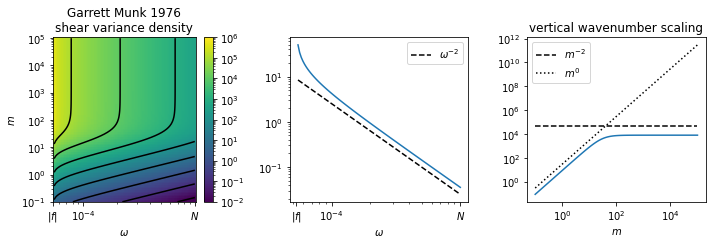

In [189]:
plt.figure(figsize=(10,3.5))
plt.subplot(1,3,1)
plt.title("Garrett Munk 1976\nshear variance density")
plt.pcolor(ω.flatten(), m.flatten(), m**2*gm, norm=matplotlib.colors.LogNorm(vmin=1e-2, vmax=1e6), shading="auto")
plt.colorbar()
plt.contour(ω.flatten(), m.flatten(), m**2*gm, levels=10.**np.arange(-2, 6), colors="k")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$m$")
plt.xlabel(r"$\omega$")
plt.xticks([f, 1e-4,  N], [r"$|f|$", r"$10^{-4}$", r"$N$"])

plt.subplot(1,3,2)
plt.loglog(ω.flatten(), 2.5e-8*ω.flatten()**-2, "k--", label=r"$\omega^{-2}$")
plt.loglog(ω.flatten(), gm[m.size//2, :])
plt.xticks([f, 1e-4,  N], [r"$|f|$", r"$10^{-4}$", r"$N$"])
plt.legend()
plt.xlabel(r"$\omega$")

plt.subplot(1,3,3)
plt.loglog(m, 5e4*m**-2*m**2, "k--", label=r"$m^{-2}$")
plt.loglog(m, 3e1*m**0*m**2, "k:", label=r"$m^{0}$")
plt.loglog(m.flatten(), gm[:, ω.size//2]*m.flatten()**2)
plt.legend()
plt.xlabel(r"$m$")
plt.title("vertical wavenumber scaling")

plt.tight_layout()

In [191]:
10/(2*np.pi)

1.5915494309189535